In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/random-linear-regression/train.csv
/kaggle/input/random-linear-regression/test.csv


In [2]:
import pandas as pd
train_data=pd.read_csv('/kaggle/input/random-linear-regression/train.csv',sep=',')
train_data.shape

(700, 2)

In [3]:
import pandas as pd
original_data=pd.read_csv('/kaggle/input/random-linear-regression/train.csv',sep=',')
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
data = my_imputer.fit_transform(original_data)
x_train=data[:,0]
y_train=data[:,1]
print(f'the shape of x_train: {x_train.shape}')
print(f'the shape of y_train: {y_train.shape}')

the shape of x_train: (700,)
the shape of y_train: (700,)


In [4]:
x_train = np.expand_dims(x_train, axis=1)
y_train = np.expand_dims(y_train, axis=1)

(0.0, 120.0)

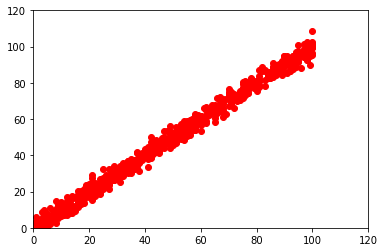

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train,color='r',vmax=100)
plt.xlim(0,120)
plt.ylim(0,120)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [7]:
scaler_linear = StandardScaler()
X_train_scaled = scaler_linear.fit_transform(x_train)
print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

Computed mean of the training set: 54.99
Computed standard deviation of the training set: 134.59


(0.0, 120.0)

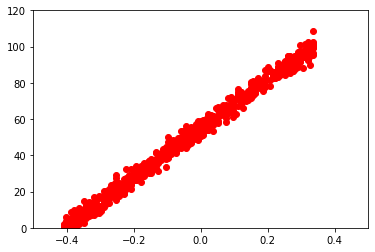

In [8]:
plt.scatter(X_train_scaled,y_train,color='r',vmax=100)
plt.xlim(-0.5,0.5)
plt.ylim(0,120)

In [9]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train )
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

training MSE (using sklearn function): 403.14636166157965


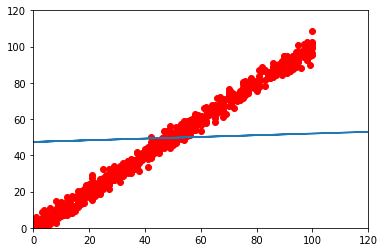

In [10]:
plt.scatter(x_train,y_train,color='r',vmax=100)
plt.xlim(0,120)
plt.ylim(0,120)
plt.plot(x_train,yhat)

In [11]:
test_data=pd.read_csv('/kaggle/input/random-linear-regression/test.csv',sep=',')
test_data = my_imputer.fit_transform(test_data)
x_test=test_data[:,0]
y_test=test_data[:,1]

In [12]:
x_test = np.expand_dims(x_test, axis=1)
y_test = np.expand_dims(y_test, axis=1)

In [13]:
X_test_scaled = scaler_linear.transform(x_test)
print(f"Mean used to scale the test set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the test set: {scaler_linear.scale_.squeeze():.2f}")

yhat = linear_model.predict(X_test_scaled)

print(f"Test MSE: {mean_squared_error(x_test, yhat) / 2}")

Mean used to scale the test set: 54.99
Standard deviation used to scale the test set: 134.59
Test MSE: 369.0591068716357


In [14]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(x_train)

# Preview the first 5 elements of the scaled training set.
print(X_train_mapped[:5])

[[  24.  576.]
 [  50. 2500.]
 [  15.  225.]
 [  38. 1444.]
 [  87. 7569.]]


In [15]:
# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Preview the first 5 elements of the scaled training set.
print(X_train_mapped_scaled[:5])

[[-0.23023243 -0.04369347]
 [-0.03704664 -0.03960478]
 [-0.29710443 -0.04443938]
 [-0.12620931 -0.04184888]
 [ 0.2378716  -0.02883267]]


In [16]:
# Initialize the class
model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train )

# Compute the training MSE
yhat_train = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat_train) / 2}")

# Add the polynomial features to the test set
X_test_mapped = poly.transform(x_test)

# Scale the test set using the mean and standard deviation of the training set
X_test_mapped_scaled = scaler_poly.transform(X_test_mapped)

# Compute the test MSE
yhat_test = model.predict(X_test_mapped_scaled)
print(f"Test MSE: {mean_squared_error(y_test, yhat_test) / 2}")

Training MSE: 3.923465585688542
Test MSE: 4.75205955724442


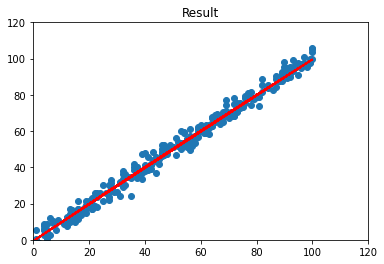

In [17]:
plt.title('Result')
plt.scatter(x_test,y_test)
plt.xlim(0,120)
plt.ylim(0,120)
plt.plot(x_test,yhat_test,color='r')